In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from keras.models import load_model
from helper import *
import process_image
model = load_model("../model/best_model/digit_classifier1.h5")

In [2]:
image_path = "../images/before/sudoku-puzzle-863979.jpg"

In [3]:
digit = process_image.pre_process_images(image_path)

In [5]:
def predict(image_grid,model_name = None):
    import numpy as np
    from keras.models import load_model
    model = load_model(model_name)
    
    image = np.reshape(image_grid,(1,28,28,1))
    
    if image.sum() > 4000:
        prediction = model.predict_classes(image, verbose = 0)
        prediction = prediction[0]
        return prediction
    else:
        return "."

In [23]:
def extract_number(digits,model_name = None):
    grid = []
    for i in range(len(digit)):
        d = digit[i]
        _,mask = cv2.threshold(d,128,255,cv2.THRESH_BINARY)
        element = cv2.getStructuringElement(cv2.MORPH_RECT, (3,3))
        mask = cv2.dilate(mask,element)
        mask = cv2.erode(mask,element, iterations = 1)
        
        pred = predict(mask,model_name)
        grid.append(pred)
    
    grid = np.reshape(grid,(9,9))
    grid = grid.T
    return grid

In [24]:
g = extract_number(digit,"../model/best_model/digit_classifier1.h5")

/home/devkumar24/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [26]:
type(g)

list

In [27]:
grid = np.reshape(g,(9,9))

In [30]:
grid = grid.T

In [100]:
def save_grid(grid,filename = None,save = True):
    import numpy as np
    if save:
        file = open(filename,"a")
        file.write("\n") 
        if type(grid) == list:
            for i in range(len(grid)):
                file.write(str(grid[i]))
        else:
            if type(grid) == np.ndarray:
                grid = list(grid)
                for i in range(len(grid)):
                    for j in grid[i]:
                        file.write(str(j))
         
        file.close()
    return np.array(grid)

In [101]:
grid = save_grid(grid,filename="../puzzles.txt")

# solve grid, puzzle

In [102]:
grid

array([['9', '3', '6', '.', '.', '.', '2', '.', '.'],
       ['.', '.', '.', '.', '9', '3', '7', '4', '.'],
       ['.', '4', '.', '8', '2', '1', '.', '.', '4'],
       ['4', '7', '2', '.', '.', '.', '.', '.', '6'],
       ['.', '.', '.', '1', '5', '4', '.', '.', '.'],
       ['1', '.', '.', '.', '.', '.', '3', '7', '8'],
       ['5', '.', '.', '4', '1', '6', '.', '2', '.'],
       ['.', '2', '1', '3', '7', '.', '.', '.', '.'],
       ['.', '.', '4', '.', '.', '.', '1', '5', '7']], dtype='<U21')

# create dataset

In [103]:
# // read grid using file or reading directly taken from image

def read_grid(filename = None):
    file = open(filename,"r")
    for line in file:
        pass
    return line

In [104]:
line = read_grid("../puzzles.txt")

In [105]:
line

'936...2......9374..4.821..4472.....6...154...1.....3785..416.2..2137......4...157'

In [106]:
len(line)

81

In [108]:
len(digit)

81

In [109]:
line[0]

'9'

In [110]:
digit[0].shape

(28, 28)

In [111]:
import pandas as pd

In [112]:
l_digit = digit.copy()

In [161]:
d = []
for i in range(len(l_digit)):
    d.append(np.reshape(l_digit[i],(-1,)))

In [162]:
d = np.array(d)

In [163]:
d.shape

(81, 784)

In [130]:
l = list(line)

In [132]:
x = pd.Series(data=l)

In [133]:
x

0     9
1     3
2     6
3     .
4     .
     ..
76    .
77    .
78    1
79    5
80    7
Length: 81, dtype: object

In [218]:
y = pd.DataFrame(data=d,dtype=np.uint8)

In [219]:
y.shape

(81, 784)

In [220]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Columns: 784 entries, 0 to 783
dtypes: uint8(784)
memory usage: 62.1 KB


In [221]:
df = pd.concat([x,y],axis=1)

In [222]:
df.dtypes

0      object
0       uint8
1       uint8
2       uint8
3       uint8
        ...  
779     uint8
780     uint8
781     uint8
782     uint8
783     uint8
Length: 785, dtype: object

In [223]:
z = df.iloc[-1]

In [224]:
z = z[1:]

In [225]:
c = np.array(z)

In [226]:
c = c.reshape(28,28,1)

TypeError: Image data of dtype object cannot be converted to float

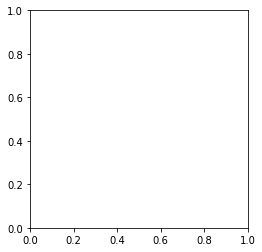

In [227]:
plt.imshow(c)